# Refined attractor invariants of quivers with potentials
See the notebook "Wall-crossing.ipynb" and [arXiv:2012.14358](https://arxiv.org/abs/2012.14358) for more details. For any stability parameter $z$, we have invariants (stacky, rational, integer DT) $A_{z}(d)$, $\bar\Omega_{z}(d)$, $\Omega_{z}(d)$ related by
$$1+\sum_{z(d)\in\ell}A_z(d)x^d=\exp\left(\frac{\sum_{z(d)\in\ell}\bar\Omega_z(d)x^d}{y^{-1}-y}\right)
=Exp\left(\frac{\sum_{z(d)\in\ell}\Omega_z(d)x^d}{y^{-1}-y}\right).$$

Let $\chi$ be the Euler form of the quiver and let $\left<-,-\right>$ be the corresponding skew-symmetric form.
For any $d\in\mathbb N^r$, consider $z_d=\left<-,d\right>:\mathbb Z^r\to\mathbb C$ and let $z$ be its generic perturbation. The corresponding invairants $A_{z}(d)$, $\bar\Omega_{z}(d)$, $\Omega_{z}(d)$ are called attractor invariants and are denoted $A_{*}(d)$, $\bar\Omega_{*}(d)$, $\Omega_{*}(d)$ respectively. They usually have a particularly simple form and they uniquely determine all other invariants.
For example, one knows that for an acyclic quiver $\Omega_*(d)=1$ if $d=e_i$ and is zero otherwise [arXiv:2012.14358](https://arxiv.org/abs/2012.14358).

For a quiver $Q$ without relations, we have a simple formula (for the trivial stability parameter)
$$A_{total}(d)=(-y)^{\chi(d,d)}\frac{[R(Q,d)]}{[GL_d]},$$
where $R(Q,d)$ is the vector space of $d$-dimensional $Q$-representations.
This formula can be used to compute all other invariants using wall-crossing formulas.

For a quiver $Q$ equipped with a potential the problem is more complicated and the total invariants (as well as all other invariants) can be computed only in some particular examples. Here we consider some of them.

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from msinvar import *
set_plots()

## Quivers without potentials
We consider first attractor invariants of some quivers without potentials.

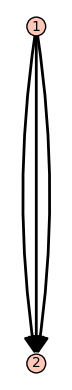

{(1, 0): 1, (0, 1): 1}

In [8]:
Q=KroneckerQuiver(3,prec=[2,2]); show(Q)
Q.intAtt().dict() #this is an acyclic quiver, so the result is trivial

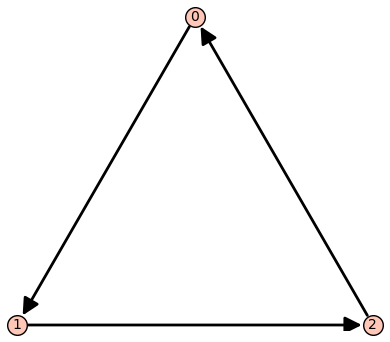

{(1, 0, 0): 1, (0, 1, 0): 1, (0, 0, 1): 1, (1, 1, 1): -y}

In [9]:
r=3
CQ=CyclicQuiver(r); show(CQ)
CQ.prec([3]*r)
CQ.intAtt().dict() # invariants for a cyclic quiver without potential

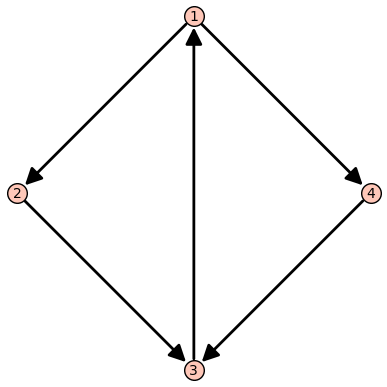

{(1, 0, 0, 0): 1,
 (0, 1, 0, 0): 1,
 (0, 0, 1, 0): 1,
 (1, 1, 1, 0): -y,
 (0, 0, 0, 1): 1,
 (1, 0, 1, 1): -y,
 (1, 1, 1, 1): y^2,
 (2, 1, 2, 1): -y^3,
 (2, 2, 2, 1): y^4,
 (2, 1, 2, 2): y^4,
 (2, 2, 2, 2): -y^5}

In [10]:
Q=Quiver('1-2-3-1,1-4-3'); show(Q)
Q.prec([2]*4)
Q.intAtt().dict()

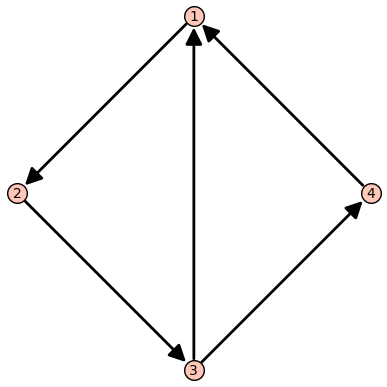

{(1, 0, 0, 0): 1,
 (0, 1, 0, 0): 1,
 (0, 0, 1, 0): 1,
 (1, 1, 1, 0): -y,
 (0, 0, 0, 1): 1,
 (1, 1, 1, 1): y^2,
 (2, 2, 2, 1): y^4,
 (2, 2, 2, 2): -y^5}

In [11]:
Q=Quiver('1-2-3-4-1,3-1'); show(Q)
Q.prec([2]*4)
Q.intAtt().dict()

## Cyclic quiver with cyclic potential

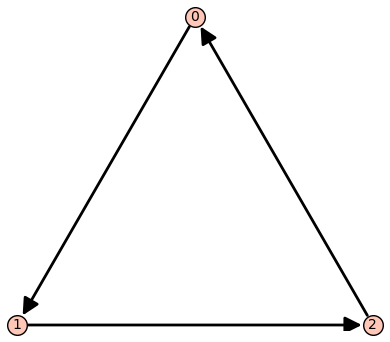

{(1, 0, 0): 1, (0, 1, 0): 1, (0, 0, 1): 1}

In [14]:
from msinvar.potential_quiver_invar import *
r=3
CQ = CyclicQuiver(r); show(CQ)
CQ.prec([3]*r)
total=cyclic_potential_total(CQ) # Total invar for a cyclic quiver with potential
CQ.intAtt(total).dict() # Attractor invariant for a cyclic quiver with potential

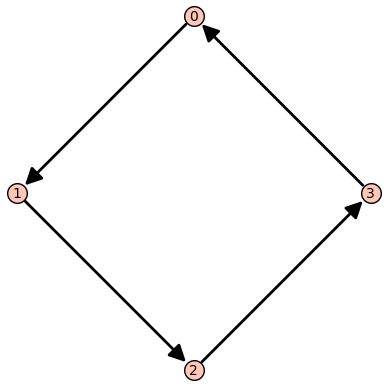

{(1, 0, 0, 0): 1, (0, 1, 0, 0): 1, (0, 0, 1, 0): 1, (0, 0, 0, 1): 1}

In [15]:
from msinvar.potential_quiver_invar import *
r=4
CQ = CyclicQuiver(r); show(CQ)
CQ.prec([3]*r)
total=cyclic_potential_total(CQ) # Total invar for a cyclic quiver with potential
CQ.intAtt(total).dict() # Attractor invariant for a cyclic quiver with potential

## Quivers with potentials arising from McKay quivers
We consider McKay quivers arising from the action of $\mathbb Z_r$ on $\mathbb C^3$ given by $(1,k,-k-1)$. 
The quiver has vertices $i\in\mathbb Z_r$ and arrows $a_i:i\to i+1$, $b_i\to i+k$, $c_i:i\to i-k-1$. Potential is a linear combination of various $3$-cycles. 
We implement such quiver with potential using translation quivers [arXiv:1911.01788](https://arxiv.org/abs/1911.01788). 
The total stacky invariants are computed using the double dimensional reduction [arXiv:2012.14358](https://arxiv.org/abs/2012.14358). Here we compute just the nilpotent part.

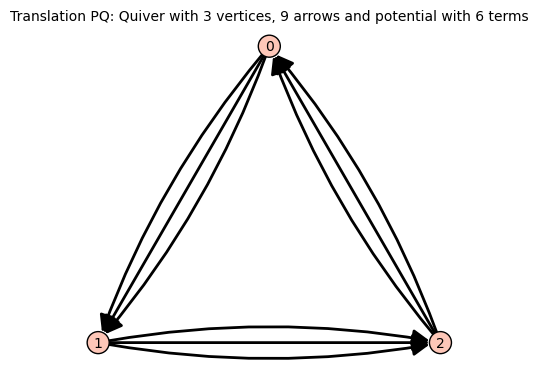

In [16]:
r, k =3, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z3

In [17]:
Q.prec([3]*r)
I=Q.translation_PQ_total() # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time Q.intAtt(I).simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 249 ms, sys: 1.36 ms, total: 250 ms
Wall time: 255 ms


{(1, 0, 0): 1,
 (0, 1, 0): 1,
 (0, 0, 1): 1,
 (1, 1, 1): (-2*y^2 - 1)/y,
 (2, 2, 2): (-2*y^2 - 1)/y,
 (3, 3, 3): (-2*y^2 - 1)/y}

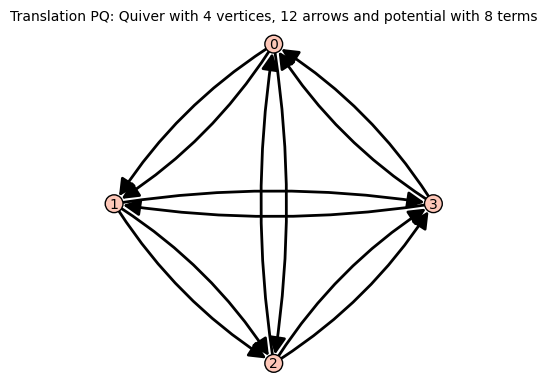

In [18]:
r, k =4, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z4 for the action (1,1,2)

In [19]:
Q.prec([2]*r)
I=Q.translation_PQ_total() # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time Q.intAtt(I).simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 325 ms, sys: 407 µs, total: 325 ms
Wall time: 325 ms


{(1, 0, 0, 0): 1,
 (0, 1, 0, 0): 1,
 (0, 0, 1, 0): 1,
 (1, 0, 1, 0): -y,
 (0, 0, 0, 1): 1,
 (0, 1, 0, 1): -y,
 (1, 1, 1, 1): (-3*y^2 - 1)/y,
 (2, 1, 2, 1): -y,
 (1, 2, 1, 2): -y,
 (2, 2, 2, 2): (-3*y^2 - 1)/y}

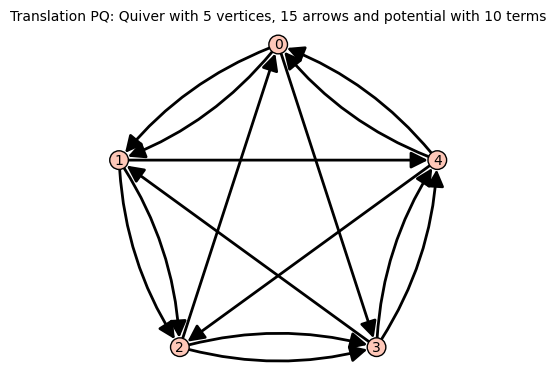

In [20]:
r, k =5, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z5 for the action (1,1,3)

In [21]:
Q.prec([2]*r)
I=Q.translation_PQ_total() # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time Q.intAtt(I).simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 2.91 s, sys: 3.08 ms, total: 2.91 s
Wall time: 2.91 s


{(1, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0): 1,
 (0, 0, 1, 0, 0): 1,
 (0, 0, 0, 1, 0): 1,
 (0, 0, 0, 0, 1): 1,
 (1, 1, 1, 1, 1): (-3*y^2 - 2)/y,
 (2, 2, 2, 2, 2): (-3*y^2 - 2)/y}

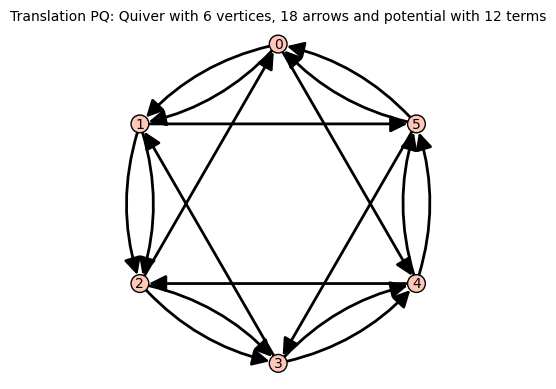

In [22]:
r, k =6, 1
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q #translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z6 for the action (1,1,4)

In [23]:
Q.prec([2]*r)
I=Q.translation_PQ_total() # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time Q.intAtt(I).simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 30 s, sys: 32 ms, total: 30 s
Wall time: 30 s


{(1, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0, 0): 1,
 (0, 0, 1, 0, 0, 0): 1,
 (0, 0, 0, 1, 0, 0): 1,
 (0, 0, 0, 0, 1, 0): 1,
 (1, 0, 1, 0, 1, 0): -y,
 (0, 0, 0, 0, 0, 1): 1,
 (0, 1, 0, 1, 0, 1): -y,
 (1, 1, 1, 1, 1, 1): (-4*y^2 - 2)/y,
 (2, 1, 2, 1, 2, 1): -y,
 (1, 2, 1, 2, 1, 2): -y,
 (2, 2, 2, 2, 2, 2): (-4*y^2 - 2)/y}

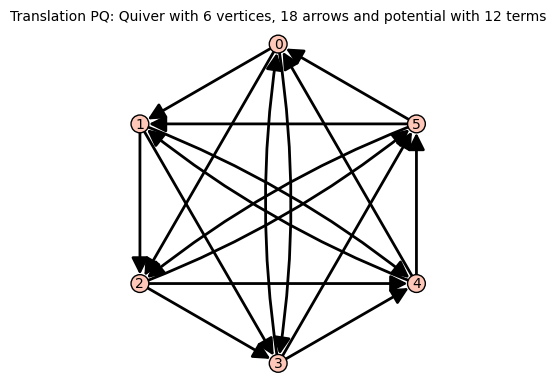

In [24]:
r, k =6, 2
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q # translation quiver with potential, see arXiv:1911.01788
# this is the McKay quiver of C3/Z6 for the action (1,2,3)

In [25]:
Q.prec([2]*r)
I=Q.translation_PQ_total() # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time Q.intAtt(I).simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 33 s, sys: 34.9 ms, total: 33 s
Wall time: 33 s


{(1, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0, 0): 1,
 (0, 0, 1, 0, 0, 0): 1,
 (0, 0, 0, 1, 0, 0): 1,
 (1, 0, 0, 1, 0, 0): -y,
 (0, 0, 0, 0, 1, 0): 1,
 (0, 1, 0, 0, 1, 0): -y,
 (1, 0, 1, 0, 1, 0): -y,
 (1, 1, 0, 1, 1, 0): -y,
 (0, 0, 0, 0, 0, 1): 1,
 (0, 0, 1, 0, 0, 1): -y,
 (0, 1, 0, 1, 0, 1): -y,
 (1, 0, 1, 1, 0, 1): -y,
 (0, 1, 1, 0, 1, 1): -y,
 (1, 1, 1, 1, 1, 1): (-5*y^2 - 1)/y,
 (2, 1, 1, 2, 1, 1): -y,
 (1, 2, 1, 1, 2, 1): -y,
 (2, 1, 2, 1, 2, 1): -y,
 (2, 2, 1, 2, 2, 1): -y,
 (1, 1, 2, 1, 1, 2): -y,
 (1, 2, 1, 2, 1, 2): -y,
 (2, 1, 2, 2, 1, 2): -y,
 (1, 2, 2, 1, 2, 2): -y,
 (2, 2, 2, 2, 2, 2): (-5*y^2 - 1)/y}

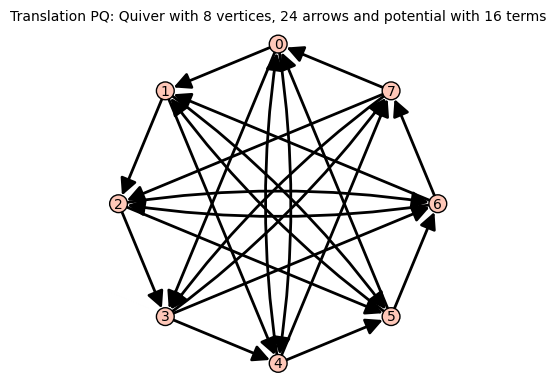

In [26]:
r,k=8,3
CQ = CyclicQuiver(r)
Q = CQ.translation_PQ(k); Q

In [27]:
Q.prec([1]*r)
I=Q.translation_PQ_total() # we compute total invariants using dimensional reduction, arXiv:2012.14358
%time Q.intAtt(I).simp().dict() # Attractor invar for the translation quiver with potential

CPU times: user 2.11 s, sys: 2.5 ms, total: 2.11 s
Wall time: 2.11 s


{(1, 0, 0, 0, 0, 0, 0, 0): 1,
 (0, 1, 0, 0, 0, 0, 0, 0): 1,
 (0, 0, 1, 0, 0, 0, 0, 0): 1,
 (0, 0, 0, 1, 0, 0, 0, 0): 1,
 (0, 0, 0, 0, 1, 0, 0, 0): 1,
 (1, 0, 0, 0, 1, 0, 0, 0): -y,
 (0, 0, 0, 0, 0, 1, 0, 0): 1,
 (0, 1, 0, 0, 0, 1, 0, 0): -y,
 (1, 1, 0, 0, 1, 1, 0, 0): -y,
 (0, 0, 0, 0, 0, 0, 1, 0): 1,
 (0, 0, 1, 0, 0, 0, 1, 0): -y,
 (0, 1, 1, 0, 0, 1, 1, 0): -y,
 (1, 1, 1, 0, 1, 1, 1, 0): -y,
 (0, 0, 0, 0, 0, 0, 0, 1): 1,
 (0, 0, 0, 1, 0, 0, 0, 1): -y,
 (1, 0, 0, 1, 1, 0, 0, 1): -y,
 (1, 1, 0, 1, 1, 1, 0, 1): -y,
 (0, 0, 1, 1, 0, 0, 1, 1): -y,
 (1, 0, 1, 1, 1, 0, 1, 1): -y,
 (0, 1, 1, 1, 0, 1, 1, 1): -y,
 (1, 1, 1, 1, 1, 1, 1, 1): (-6*y^2 - 2)/y}